### Task 1. KNN

### Importing all required modules

In [95]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [20]:
data = pd.read_csv('DatasetAndTemplate2/diabetes.txt')
data.head()
data_d = data.copy()

In [21]:
data_d['class'] = data_d['class'].map({'tested_positive':1, 'tested_negative':0})

**Seperating data to source and target -  for 10 fold part only**

In [22]:
X_data = data_d.iloc[:,:-1]

In [23]:
y_data = data_d.iloc[:,-1]

In [25]:
X_data

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


**User defined function**\
Function takes in two rows, but only 3 features that are random.

In [87]:
def distance_cw2(col1, col2):
    total = 0
    ranges = (range(len(col1)))
    elements = random.sample(ranges, k=3)
    
    for x in range(len(elements)):
        diff = (col1[elements[x]] - col2[elements[x]])
        total += diff**2
    dist = np.sqrt(total)
    # return distance between rows col1 and col2
    return dist



row1 = [1,3,5,7]
row2 = [4,9,4,2]
distance_cw2(row1,row2)

6.782329983125268

## 10 folds for KNN but data  - not scaled
### Function run_all takes in the number of folds and the Panda DF

In [88]:

def run_all(n_KFolds, X,y):
    
    kfold_list = []
    mean_scores = []
    std_scores = []
    
    # function loops through all 3 metrics and the user defined one "distance_cw2"
    metrics = ['euclidean', 'manhattan','chebyshev', distance_cw2]
    neighbors = [1,3,5,7]
    totals = []
    
    XX = X.copy()
    XX = XX.to_numpy()
    
    kfolds = KFold(n_splits=n_KFolds)

    for m in metrics:
        #print(m)

        for i in neighbors:
            model = KNeighborsClassifier(n_neighbors=i, metric=m)
            #print(i)

            
            for train_index, test_index in kfolds.split(XX):
                X_train, X_test, y_train, y_test = XX[train_index], XX[test_index],\
                y[train_index], y[test_index]

                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                #print(accuracy_score(y_pred, y_test))
                kfold_list.append(accuracy_score(y_pred, y_test))

            totals.append((m, i , np.mean(kfold_list), np.std(kfold_list)))        
            #print('this is mean score' + str(np.mean(kfold_list)))
        
    totals_pd = pd.DataFrame(totals, columns=['Metric', 'K', 'mean_score', 'std_score'])
    
    #Function returna pd dataframe
    return totals_pd
    
run_all(10,X_data, y_data)

,Metric,K,mean_score,std_score
0,euclidean,1,0.677051,0.063497
1,euclidean,3,0.691328,0.063668
2,euclidean,5,0.703070,0.065208
3,euclidean,7,0.713504,0.065763
4,manhattan,1,0.709334,0.065781
5,manhattan,3,0.706989,0.064396
6,manhattan,5,0.711254,0.065254
7,manhattan,7,0.713643,0.065356
8,chebyshev,1,0.710441,0.064417
9,chebyshev,3,0.709829,0.064680


### Comparing differernt mean scores of the 4 metrics - not scaled

In [84]:
# test the function and assign to pd
pd = run_all(10,X_data, y_data)

**We can see that manhattan and chebyshev perform better and with lower variance**

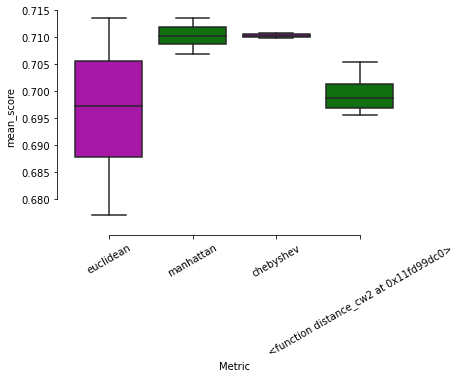

In [85]:
import seaborn as sns
def plot_bar(df):
    
    sns.boxplot(x="Metric", y="mean_score",
                palette=["m", "g"],data=df)
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=30)
    
plot_bar(pd)

## 10 folds and scaled data for KNN

In [112]:
def run_all(n_KFolds, X,y):
    
    kfold_list = []
    mean_scores = []
    std_scores = []
    
    # function loops through all 3 metrics and the user defined one "distance_cw2"
    metrics = ['euclidean', 'manhattan','chebyshev', distance_cw2]
    neighbors = [1,3,5,7]
    totals = []
    
    XX = X.copy()
    XX = XX.to_numpy()
    
    kfolds = KFold(n_splits=n_KFolds)

    for m in metrics:

        for i in neighbors:
            model = KNeighborsClassifier(n_neighbors=i, metric=m)
            
            for train_index, test_index in kfolds.split(XX):
                X_train, X_test, y_train, y_test = XX[train_index], XX[test_index],\
                y[train_index], y[test_index]
                
                scaler = StandardScaler()
                scaler.fit(X_train)
                X_train = scaler.transform(X_train)

                model.fit(X_train, y_train)
                
                X_test = scaler.transform(X_test)
                
                y_pred = model.predict(X_test)
                
                kfold_list.append(accuracy_score(y_pred, y_test))

            totals.append((m, i , np.mean(kfold_list), np.std(kfold_list)))        
        
    totals_pd = pd.DataFrame(totals, columns=['Metric', 'K', 'mean_score', 'std_score'])
    
    #Function returna pd dataframe
    return totals_pd
    
run_all(10,X_data, y_data)

,Metric,K,mean_score,std_score
0,euclidean,1,0.707023,0.051125
1,euclidean,3,0.725889,0.059158
2,euclidean,5,0.731733,0.064301
3,euclidean,7,0.734334,0.064849
4,manhattan,1,0.726541,0.062833
5,manhattan,3,0.726116,0.063295
6,manhattan,5,0.727280,0.063224
7,manhattan,7,0.728971,0.064412
8,chebyshev,1,0.725232,0.064270
9,chebyshev,3,0.726008,0.063363


### Comparing differernt mean scores of the 4 metrics - Scaled

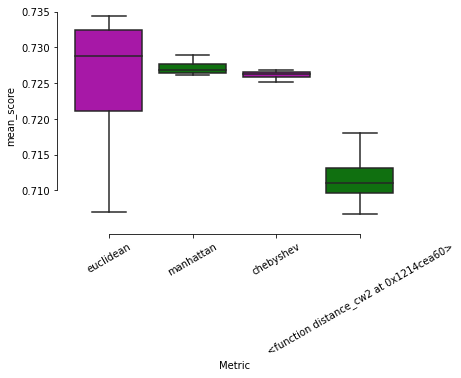

In [114]:
pd = run_all(10, X_data, y_data)
def plot_bar(df):
    
    sns.boxplot(x="Metric", y="mean_score",
                palette=["m", "g"],data=df)
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=30)
    
plot_bar(pd)

# Task 2

## To compare the performance of KNN, DT, and NN, and then plot the performance

### Part 1 is to create a function to generate noise in the labels, and that increaments in 2% from 0 to 30%

**Import the data to correct assignments**

In [91]:
data_ready = pd.read_csv('DatasetAndTemplate2/task2_train.txt')
test_data = pd.read_csv('DatasetAndTemplate2/task2_test.txt')

In [92]:
#takes in a DF and a percentage(frac) amount to sample from

def add_noise(df, frac):
    XX = df.copy()
    SS = XX.sample(frac=frac)
    #print(SS)
    #print(SS['class'].map({1:0, 0:1}))
    XX.loc[SS.index , 'class'] = SS['class'].map({1:0, 0:1})
    
    return XX 
    

#add_noise(dd, 0.3)

### Part 2 is to test the DT, KNN and NN with the noisy data function

**Will start with testing the DT with noisy data function**\
No scaling required with DT

In [104]:
def run_DT(n_iter, noise_per, inc):

    TX = test_data.iloc[:,:-1]
    TY = test_data.iloc[:,-1]

    totals_DT = []
    scores = []
    df_lift = []

    #iterate through the 0 to 30% samples of noisy data
    for f in np.arange(0,noise_per, inc):
        #iterate through the 0 to 50 times, then collect average scores
        for i in range(0,n_iter):
            df = add_noise(data_ready,f)

            XX = df.iloc[:,:-1]
            YY = df.iloc[:,-1]

            X_train, X_test, y_train, y_test = train_test_split(XX,YY, random_state=123)

            #no scaling performed in DT
            model = DecisionTreeClassifier()
            model.fit(X_train, y_train)
            y_pred_TX = model.predict(TX)

            scores.append(accuracy_score(y_pred_TX, TY))

        #append average result of 50 iteration
        totals_DT.append(np.mean(scores))
    
    return totals_DT

        
run_DT(50, 0.32, 0.02)

[0.6650847457627118,
 0.6472881355932203,
 0.6336723163841809,
 0.6292372881355933,
 0.6243389830508475,
 0.622090395480226,
 0.6194673123486683,
 0.6162288135593221,
 0.6128436911487759,
 0.61,
 0.6089368258859785,
 0.6058474576271187,
 0.6023989569752282,
 0.5986440677966102,
 0.595864406779661,
 0.5934110169491525]

**Now we try to test the noisy data but with KNN**\
Data is scaled

In [105]:
def run_KNN(n_iter, noise_per, inc):
    
    TX = test_data.iloc[:,:-1]
    TY = test_data.iloc[:,-1]

    totals_knn = []
    scores = []
    df_lift = []

    #iterate through the 0 to 30% samples of noisy data
    for f in np.arange(0,noise_per, inc):

        #iterate through the 0 to 50 times, then collect average scores
        for i in range(0,n_iter):
            df = add_noise(data_ready,f)

            XX = df.iloc[:,:-1]
            YY = df.iloc[:,-1]

            X_train, X_test, y_train, y_test = train_test_split(XX,YY, random_state=123)

            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)

            model = KNeighborsClassifier(n_neighbors=5, weights='distance')
            model.fit(X_train, y_train)

            TXX = scaler.transform(TX)
            y_pred_TX = model.predict(TXX)

            scores.append(accuracy_score(y_pred_TX, TY))

        #append average result of 50 iteration
        totals_knn.append(np.mean(scores))
    return totals_knn
        
run_KNN(50,0.32,0.02)

[0.6610169491525423,
 0.6596610169491526,
 0.655367231638418,
 0.6522033898305085,
 0.6490169491525424,
 0.6484745762711865,
 0.6457142857142857,
 0.6423728813559322,
 0.6413559322033898,
 0.6385762711864407,
 0.6363944530046224,
 0.6338983050847459,
 0.6305084745762712,
 0.6277966101694916,
 0.6246101694915255,
 0.6218008474576271]

**Last to test the noisy data with NN**\
Data is scaled

In [97]:
def run_NN():
    
    TX = test_data.iloc[:,:-1]
    TY = test_data.iloc[:,-1]

    totals_NN = []
    scores = []

    #iterate through the 0 to 30% samples of noisy data
    for f in np.arange(0,0.32, 0.02):

        #iterate through the 0 to 50 times, then collect average scores
        for i in range(0,50):
            df = add_noise(data_ready,f)

            XX = df.iloc[:,:-1]
            YY = df.iloc[:,-1]

            X_train, X_test, y_train, y_test = train_test_split(XX,YY, random_state=123)

            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train = scaler.transform(X_train)

            model = MLPClassifier(hidden_layer_sizes=(8,3), max_iter=300)
            model.fit(X_train, y_train)

            TXX = scaler.transform(TX)
            y_pred_TX = model.predict(TXX)

            scores.append(accuracy_score(y_pred_TX, TY))

        #append average result of 50 iteration
        totals_NN.append(np.mean(scores))
    
    return totals_NN

run_NN()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/pyt

[0.6332203389830507, 0.648135593220339, 0.6503954802259887, 0.6504237288135593, 0.6524745762711863, 0.654180790960452, 0.6537046004842615, 0.6532203389830508, 0.6538983050847458, 0.6538644067796611, 0.653004622496148, 0.6515536723163842, 0.6497783572359843, 0.649225181598063, 0.648587570621469, 0.6466525423728814]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Compare results**\
Collect all the lists into a DF for comparing performance\
Used a DF to collect all averged results

In [106]:
noise = np.arange(0,0.32, 0.02)

compare = pd.DataFrame(
    {'Noise' : noise,
    'DT': totals_DT,
     'KNN': totals_knn,
     'Neural Net': totals_NN,
    })

**Plot the differernt classifier with the noise on the X axis**

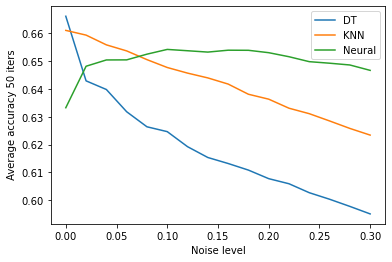

In [109]:
sns.lineplot(data=compare, x='Noise', y='DT', label='DT')
sns.lineplot(data=compare, x='Noise', y='KNN', label='KNN')
sns.lineplot(data=compare, x='Noise', y='Neural Net', label='Neural')
plt.ylabel(' Average accuracy 50 iters')
plt.xlabel('Noise level')
plt.legend();

# Task 3 Reflection 

**Task 1**.  KNN (scaled part) was performed for different metrics, and noticed how slow the user defined metric was. Over all the Chebyshev and Manhattan metric performed best and showed a low variance. If the 10 fold simulates noise, then the Manhattan seems the best on average to handle noise.

The Euclidean metric also showed some high scores but on average its had a high variance. I would recommend using the Chebyshev, it seems more reliable on average to handle many folds.

**Task 2.**  The KNN badly and this can be due to the noise, it seems that introducing noise to the data quickly deteriorates the performance of the KNN. As seen from the plot of classifier comparison, the NN held best with the noisy data. 

**Limitation:**

NN become extreme slow, even though it performed well in the noisy data set, but computational performance will be an issue when scaled up, computationally expensive and its black box counter intuitiveness. 

DT, clearly seem very sensitive to changes in data, hence the fast drop in performance when increasing the noise (exponential decay).

**Possible improvements:**

**1** To try different metric when running the KNN, and try different hyper parameters. This parameter tunning may help in finding the best metric and K to increase performance. I may prefer the KNN over the NN due to its speed. This is also a small data set, so larger ones will surely have an effect on the business side of things.

**2** Some feature selection may help in reducing the size of the data, (looking for relevant features) this will reduce the data set and hence may choose different models, maybe from KNN to NN.
